<a href="https://colab.research.google.com/github/gaberibr/Case-Students_Performance_in_Exams/blob/main/Case_Unicorns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [89]:
Data_Base = pd.read_csv('unicorns.csv')
Data_Base.shape

(1186, 7)

In [91]:
Data_Base.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [115]:
Data_Base.rename( columns={
    'Unnamed: 0' : 'Id',
}, inplace=True )

In [116]:
Data_Base.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [93]:
Data_Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [94]:
Data_Base.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

<Axes: title={'center': 'Null Fields'}>

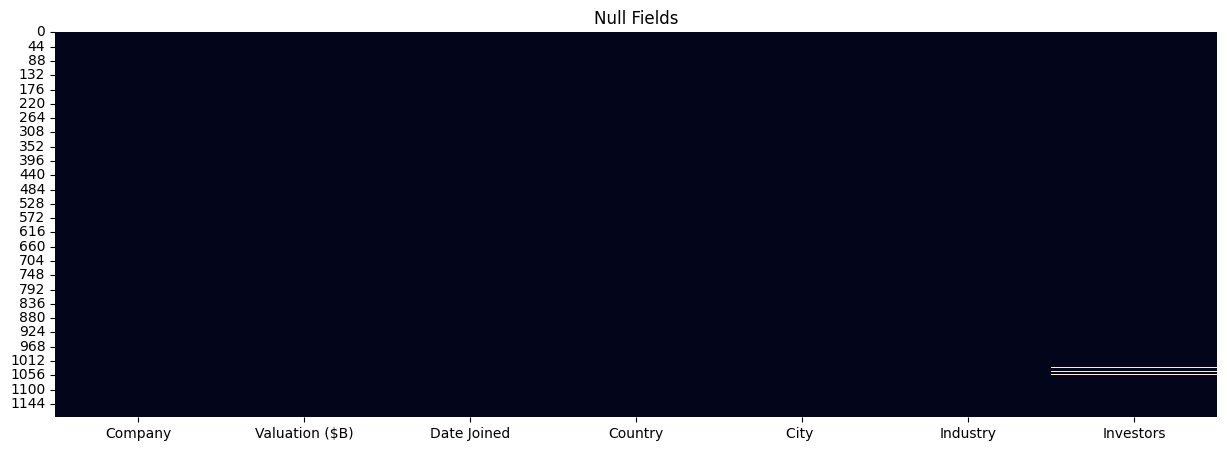

In [95]:
plt.figure (figsize=(15,5))
plt.title('Null Fields')
sns.heatmap(Data_Base.isnull(), cbar=False)

In [96]:
Data_Base.nunique()

Company           1183
Valuation ($B)     222
Date Joined        695
Country             48
City               286
Industry            34
Investors         1152
dtype: int64

In [97]:
Data_Base['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [98]:
Data_Base['Industry'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [99]:
Data_Base['Industry'].value_counts(normalize=True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

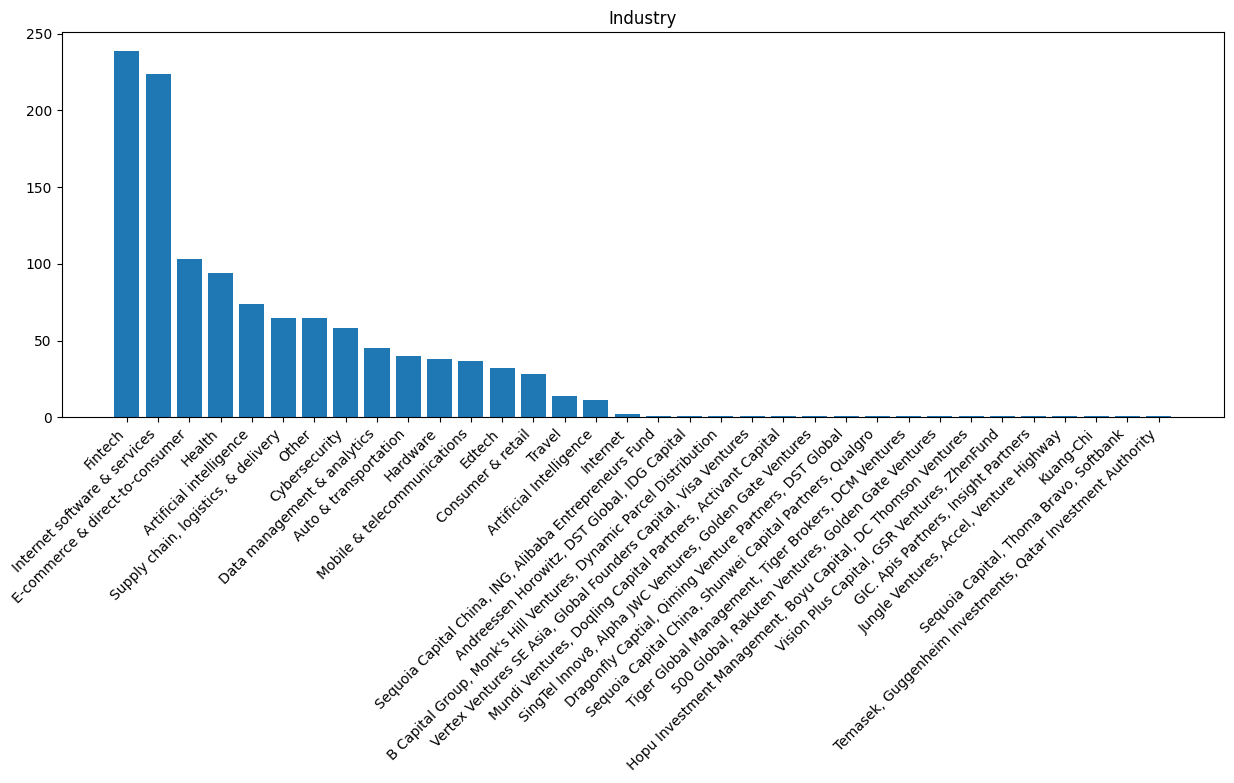

In [100]:
plt.figure(figsize=(15,5))
plt.title('Industry')
plt.bar(Data_Base['Industry'].value_counts().index, Data_Base['Industry'].value_counts())
plt.xticks(rotation=45, ha='right');

In [101]:
Data_Base['Country'].value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia             

In [102]:
Analysis = round(Data_Base['Country'].value_counts(normalize=True)*100,1)

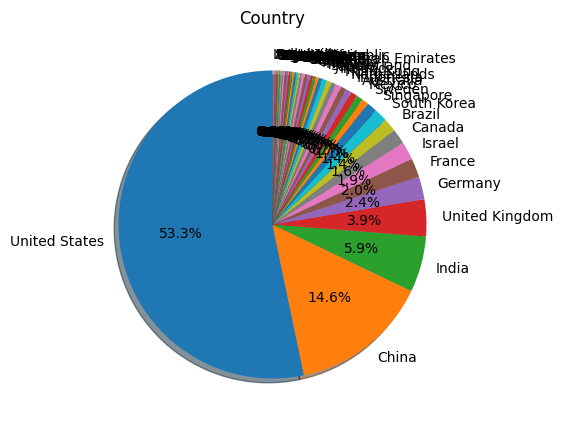

In [103]:
plt.figure(figsize=(15,5))
plt.title('Country')
plt.pie(
    Analysis,
    labels = Analysis.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

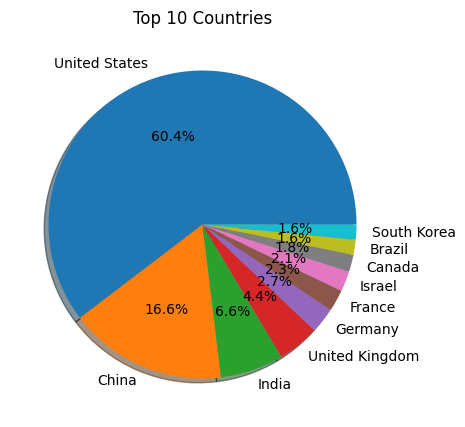

In [104]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Countries')
plt.pie(
    Analysis.head(10),
    labels = Analysis.index[0:10],
    shadow=True,
    autopct='%1.1f%%'
);

In [105]:
Data_Base['Date Joined'] = pd.to_datetime(Data_Base['Date Joined'])
Data_Base['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [106]:
Data_Base['Month'] = pd.DatetimeIndex (Data_Base['Date Joined']).month
Data_Base['Year'] = pd.DatetimeIndex (Data_Base['Date Joined']).year

Data_Base.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [137]:
Analysis_Group = Data_Base.groupby(by=['Country', 'Year', 'Month', 'Company']).count().reset_index()

In [125]:
Analysis_Group

,Country,Year,Month,Company,Valuation ($B),Date Joined,City,Industry,Investors
0,Argentina,2021,8,Uala,1,1,1,1,1
1,Australia,2018,1,Canva,1,1,1,1,1
2,Australia,2019,3,Airwallex,1,1,1,1,1
3,Australia,2021,5,SafetyCulture,1,1,1,1,1
4,Australia,2021,7,Culture Amp,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1181,United States,2022,8,Flow,1,1,1,1,1
1182,United States,2022,8,Incredible Health,1,1,1,1,1
1183,United States,2022,8,Orna Therapeutics,1,1,1,1,1
1184,Vietnam,2021,10,Sky Mavis,1,1,1,1,1


In [126]:
Analysis_Group.loc[
  Analysis_Group['Country'] == 'Brazil'
]

,Country,Year,Month,Company,Valuation ($B),Date Joined,City,Industry,Investors
16,Brazil,2018,7,Movile,1,1,1,1,1
17,Brazil,2018,11,iFood,1,1,1,1,1
18,Brazil,2019,6,Loggi,1,1,1,1,1
19,Brazil,2019,9,QuintoAndar,1,1,1,1,1
20,Brazil,2019,10,EBANX,1,1,1,1,1
21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1
22,Brazil,2020,1,Loft,1,1,1,1,1
23,Brazil,2020,12,C6 Bank,1,1,1,1,1
24,Brazil,2020,12,Creditas,1,1,1,1,1
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1


In [129]:
Data_Base['Valuation ($B)'] = pd.to_numeric(Data_Base['Valuation ($B)'].apply(lambda Linha: Linha.replace('$', '')))
Data_Base.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [145]:
Analysis_Country = Data_Base.groupby(by=['Country']).sum(['Value ($B)']).reset_index()
Analysis_Country.head()

,Country,Valuation ($B),Month,Year
0,Argentina,2.45,8,2021
1,Australia,54.40,41,16165
2,Austria,7.61,9,4042
3,Bahamas,32.00,7,2021
4,Belgium,8.95,9,6062


In [146]:
Analysis_Country

,Country,Valuation ($B),Month,Year
0,Argentina,2.45,8,2021
1,Australia,54.40,41,16165
2,Austria,7.61,9,4042
3,Bahamas,32.00,7,2021
4,Belgium,8.95,9,6062
5,Bermuda,1.60,4,2017
6,Brazil,40.08,135,34342
7,Canada,49.23,97,38401
8,Chile,2.50,9,4043
9,China,678.59,1083,351237


In [151]:
Analysis_Valuation = (Analysis_Country.sort_values('Valuation ($B)', ascending=False))
Analysis_Valuation.head()

,Country,Valuation ($B),Month,Year
46,United States,2069.89,3924,1284977
9,China,678.59,1083,351237
45,United Kingdom,205.45,315,92919
20,India,202.92,483,141436
18,Germany,80.88,179,58593


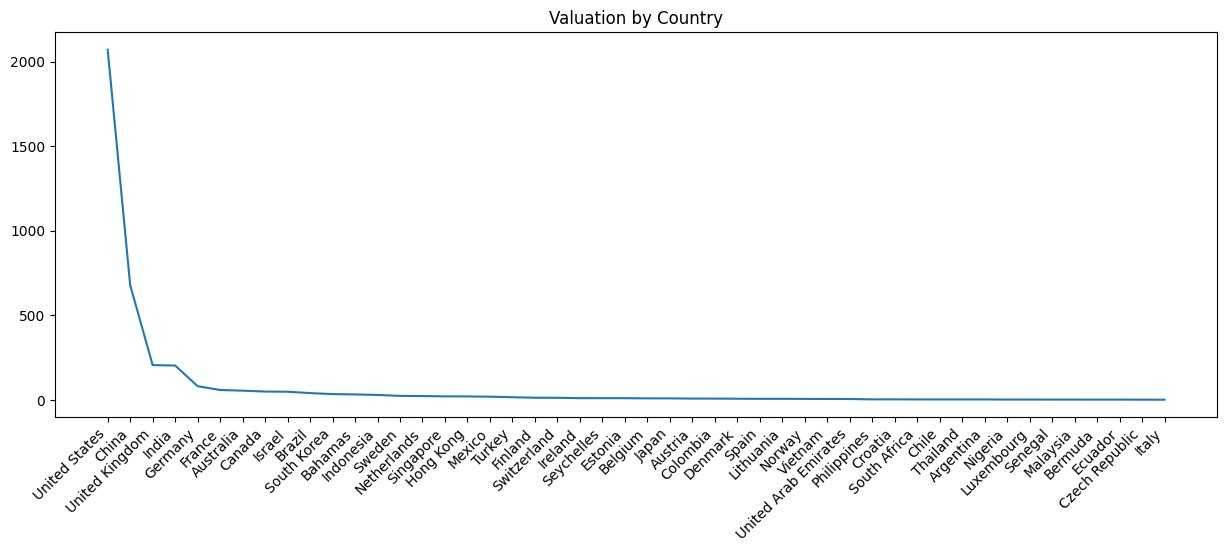

In [157]:
plt.figure(figsize=(15,5))
plt.title('Valuation by Country')
plt.plot(Analysis_Valuation['Country'], Analysis_Valuation ['Valuation ($B)'])
plt.xticks(rotation=45, ha='right');